In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [104]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [105]:
X = df.drop('target', axis = 1)
y = df['target']

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering

### An unsupervised clustering algorithm that groups data points into K clusters based on feature similarity.

*  How it works:

    1.   Choose the number of clusters (K).
    2.   Randomly pick K centroids (cluster centers).
    3.   Assign each point to the nearest centroid (using Euclidean distance by default).
    4.   Update centroids as the mean of all points in each cluster.
    5.   Repeat steps 3–4 until assignments stop changing (convergence).

*   Choosing K:

Use the elbow method, silhouette score, or gap statistic to find the optimal number of clusters.






In [107]:
# Elbow method to find optimal K
inertia = []
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

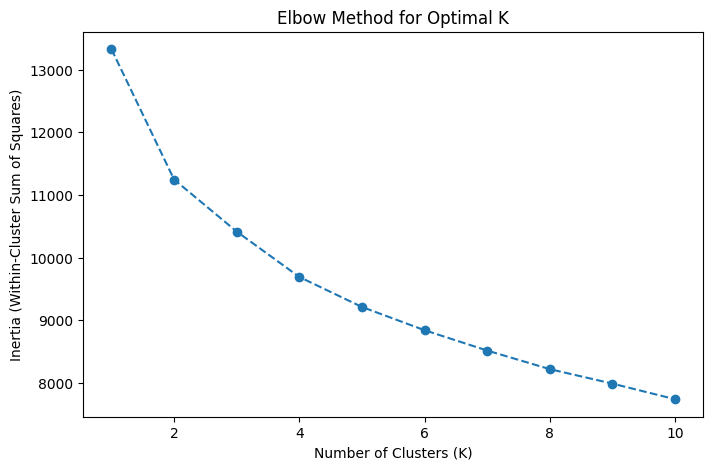

In [108]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [109]:
# from elbow plot we pick K=2 (since disease target has 2 classes)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=100)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering

### An unsupervised clustering technique that builds a hierarchy of clusters without needing to predefine the number of clusters.


*   How it works:


    *   Agglomerative (bottom-up): Start with each point as its own cluster, then merge the closest clusters step by step until all points are in one cluster.
    *   Divisive (top-down): Start with all points in one cluster, then split clusters recursively.

*   Key Tool: The dendrogram
    *    a tree-like diagram that shows how clusters merge/split. You can “cut” the dendrogram at a chosen level to decide the number of clusters.



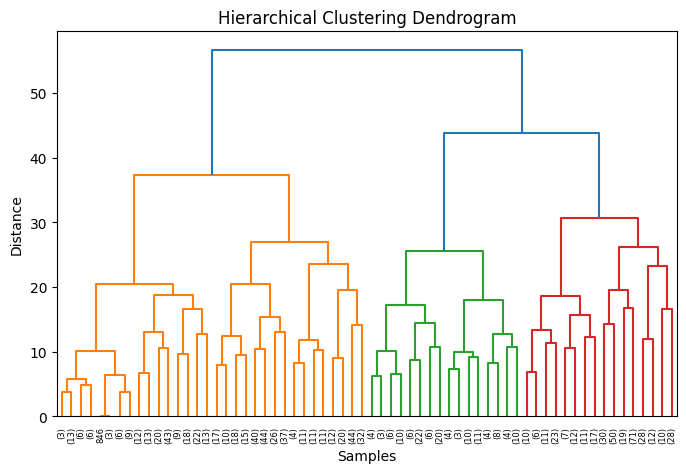

In [110]:
plt.figure(figsize=(8,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z,truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [111]:
# Agglomerative clustering (Bottom_Up)
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)

In [112]:
# adjusted_rand_score(y, labels) measures similarity between two labelings, adjusted for chance.
# Range: 1.0 = perfect agreement, 0 ≈ random labeling, negative means worse-than-random.

print("🔹 K-Means vs True Labels (Adjusted Rand Index):", adjusted_rand_score(y, kmeans_labels))
print("🔹 Hierarchical vs True Labels (Adjusted Rand Index):", adjusted_rand_score(y, hier_labels))

🔹 K-Means vs True Labels (Adjusted Rand Index): 0.36409106000433716
🔹 Hierarchical vs True Labels (Adjusted Rand Index): 0.23247039978320555


In [113]:
# silhouette_score(X, labels) measures how well clusters are separated
# Range (-1) to (+1). Values near (+1) mean well-separated, (0) indicates overlapping clusters, negative suggest misassignment.
# Use silhouette to assess cluster compactness and separation without needing true labels.

print("🔹 K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("🔹 Hierarchical Silhouette Score:", silhouette_score(X_scaled, hier_labels))

🔹 K-Means Silhouette Score: 0.1700813691485787
🔹 Hierarchical Silhouette Score: 0.13308610336075302
